### 10. Pseudo random number generator II
10. Pseudo random number generator II
Generate a time series of $10^5$ random numbers with an LCG with larger
period (e.g., *drand48*) and compute $X$ and $\sigma^2_X$
for $N = 10^3$ , $10^4$ , and
$10^5$ random numbers. Compare the values with the exact analytical
results. Repeat problems 8d) and 8e) with this LCG.
$$
X_{i+1} = (aX_i + c) \mod m,
$$

$a = 25214903917$, $c = 11$, $m = 2^{48}$,
$X_0 = 1$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
a = 25214903917
c = 11
m = 2**48
prev_number = 1
def LCG():
    global prev_number
    prev_number = ((a*prev_number+c) % m)
    return prev_number / m


In [31]:
#load random numbers
X = np.array([LCG() for x in range(0,10**5)])

In [32]:
means = []
variances = []
for N in [10**3,10**4,10**5]:
    means.append(np.mean(X[:N]))
    variances.append(np.std(X[:N])**2)

print(f"N =\t\t10^3\t\t10^4\t\t10^5\t\texpected")
print(f"mean\t\t"   + "\t".join(f"{mean:.8f}" for mean in means)   +"\t0.5")
print(f"variance\t" + "\t".join(f"{var:.8f}" for var in variances) + "\t0.08333333")

N =		10^3		10^4		10^5		expected
mean		0.49721533	0.49930452	0.49911781	0.5
variance	0.08380405	0.08330737	0.08312426	0.08333333


**d)** Plot the so-called running average $\overline{X}(n) = \sum^n_{i=1} X_i\,/\,n$ as function
of $n$ in the interval $n \in [30\,000, 40\,000]$.

In [33]:
n = np.arange(3*1e4,4*1e4,dtype=int)
running_avg = np.array([np.mean(X[:n_val]) for n_val in n])


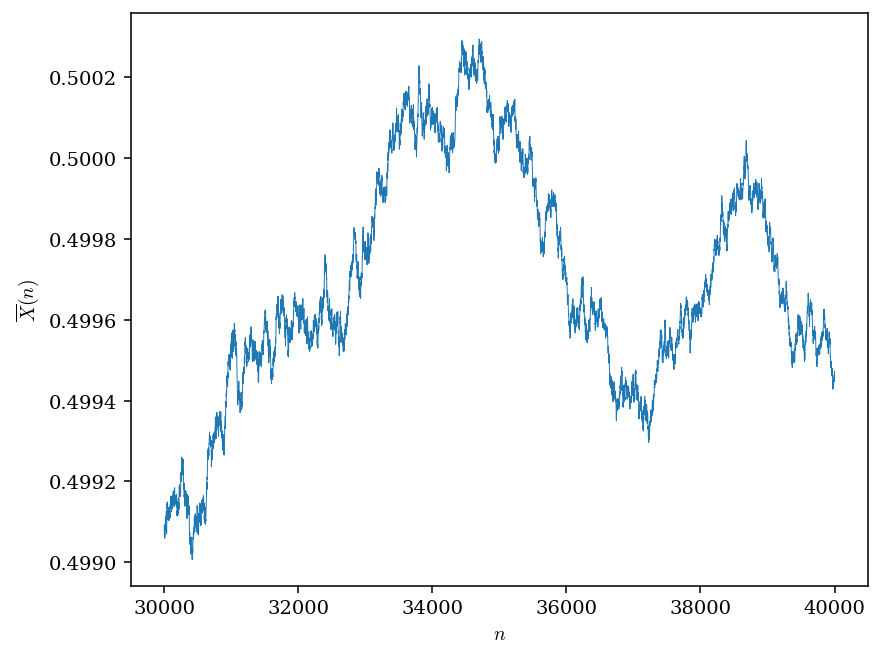

In [34]:
plt.plot(n,running_avg, lw=0.5)
plt.ylabel(r"$\overline{X}(n)$")
plt.xlabel(r"$n$")

plt.show()

**e)** Plot an $xy$ graph with $x = X_i$ and $y = X_{i+1}$ for $i = 1, 3, 5, ...$

In [35]:
x = X[:10**4:2]
y = X[1:10**4+1:2]

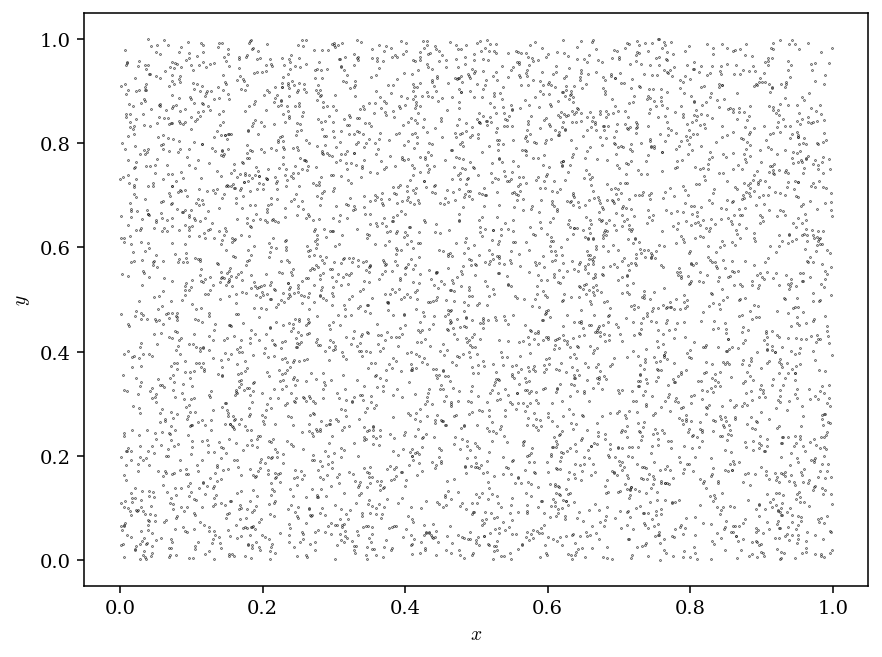

In [36]:
plt.plot(x,y,"k.",ms=0.5)
plt.ylabel(r"$y$")
plt.xlabel(r"$x$")

plt.show()